In [1]:
import pandas as pd
import numpy as np
import requests
from pandas.io.json import json_normalize
from flatten_json import flatten
from datetime import date

In [2]:
#import
pm25 = pd.read_csv('data/openaq_pm25.csv')
no2 = pd.read_csv('data/openaq_NO2.csv')
o3 = pd.read_csv('data/openaq_o3.csv')
co = pd.read_csv('data/openaq_co.csv')

In [3]:
# Concat pm25 e NO2
data = pd.concat([pm25,no2,o3,co])

In [4]:
data.shape
data.columns

Index(['Unnamed: 0', 'index', 'city', 'coordinates_latitude',
       'coordinates_longitude', 'country', 'date_local', 'date_utc',
       'location', 'parameter', 'unit', 'value'],
      dtype='object')

# Date

In [5]:
data['datetime'] = pd.to_datetime(data['date_utc'])
data['date'] = data['datetime'].dt.strftime('%Y-%m-%d')
data['hour'] = data['datetime'].dt.strftime('%H:%M:%S')
data.head()

,Unnamed: 0,index,city,coordinates_latitude,coordinates_longitude,country,date_local,date_utc,location,parameter,unit,value,datetime,date,hour
0,0,0,Madrid,40.59333,-3.50306,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,ES1838A,pm25,µg/m³,25.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00
1,1,1,Madrid,40.63389,-4.01333,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,ES1803A,pm25,µg/m³,13.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00
2,2,2,Madrid,40.18528,-3.67972,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,ES1809A,pm25,µg/m³,10.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00
3,3,3,Madrid,40.43000,-3.54583,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,ES1869A,pm25,µg/m³,35.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00
4,4,4,Madrid,40.47917,-3.37778,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,ES1563A,pm25,µg/m³,18.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00


In [6]:
# Separar dia e mês
data['day'] = data['date'].apply(lambda x: str(x)[8:])
data['month'] = data['date'].apply(lambda x: str(x)[5:7])
data.head()

,Unnamed: 0,index,city,coordinates_latitude,coordinates_longitude,country,date_local,date_utc,location,parameter,unit,value,datetime,date,hour,day,month
0,0,0,Madrid,40.59333,-3.50306,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,ES1838A,pm25,µg/m³,25.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00,30,03
1,1,1,Madrid,40.63389,-4.01333,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,ES1803A,pm25,µg/m³,13.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00,30,03
2,2,2,Madrid,40.18528,-3.67972,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,ES1809A,pm25,µg/m³,10.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00,30,03
3,3,3,Madrid,40.43000,-3.54583,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,ES1869A,pm25,µg/m³,35.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00,30,03
4,4,4,Madrid,40.47917,-3.37778,ES,2020-03-30T03:00:00+02:00,2020-03-30T01:00:00.000Z,ES1563A,pm25,µg/m³,18.0,2020-03-30 01:00:00+00:00,2020-03-30,01:00:00,30,03


In [7]:
# data.dtypes
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)
data.dtypes
# data.head()

Unnamed: 0                             int64
index                                  int64
city                                  object
coordinates_latitude                 float64
coordinates_longitude                float64
country                               object
date_local                            object
date_utc                              object
location                              object
parameter                             object
unit                                  object
value                                float64
datetime                 datetime64[ns, UTC]
date                                  object
hour                                  object
day                                    int32
month                                  int32
dtype: object

# Data cleaning

In [8]:
data.month.unique()
data.day.unique()
# data = data.groupby(['CountryName'])['CountryName'].count()

array([30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 31, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  3,  2,  1,  4],
      dtype=int64)

In [9]:
# Removing columns
data.columns
data.drop(columns=['Unnamed: 0'], inplace =True)
data.columns

Index(['index', 'city', 'coordinates_latitude', 'coordinates_longitude',
       'country', 'date_local', 'date_utc', 'location', 'parameter', 'unit',
       'value', 'datetime', 'date', 'hour', 'day', 'month'],
      dtype='object')

In [10]:
# Cleaning names
data['city'].replace(['New York-Northern New Jersey-Long Island'], 'New York', inplace = True)
data.city.unique()

array(['Madrid', 'Delhi', 'Lisboa', 'New York', 'Santiago'], dtype=object)

In [11]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
msno.matrix(data)
plt.show()

<Figure size 2500x1000 with 2 Axes>

In [12]:
data.isnull().sum()

index                    0
city                     0
coordinates_latitude     0
coordinates_longitude    0
country                  0
date_local               0
date_utc                 0
location                 0
parameter                0
unit                     0
value                    0
datetime                 0
date                     0
hour                     0
day                      0
month                    0
dtype: int64

In [13]:
# Estatística descritiva
data.groupby(['city', 'month','parameter'])['value'].describe()

count        mean         std       min       25%  \
city     month parameter                                                       
Delhi    2     co         5000.0  943.603760  808.956897 -29000.00  520.0000   
               no2        5000.0   43.587200  301.326242      0.00   24.5950   
               o3         5000.0   34.626154   30.966085     -6.70   12.6675   
               pm25       5000.0   88.545590   65.543690      0.00   69.0000   
         3     co         5000.0  506.626080  376.927906      0.00  230.0000   
               no2        5000.0   16.991308   73.883605   -323.92    8.4000   
               o3         5000.0   42.181890   45.900160     -4.79   18.1975   
               pm25       5000.0   81.432046  262.621001  -1262.00   15.8925   
Lisboa   2     co         3158.0  427.826789  220.285847    107.00  268.0000   
               no2        5000.0   34.823920   26.299808      1.30   14.3000   
               o3         5000.0   43.390720   26.920995      0.00   19.0000   
               pm25         77.0   13.357143    6.099211      1.70    7.4000   
         3     co         3161.0  295.266055  122.479623     80.00  213.0000   
               no2        5000.0   13.518460   10.985368      0.70    5.7000   
               o3         5000.0   68.145960   19.932853      1.50   57.0000   
               pm25        126.0    9.178571    4.301825      1.20    6.0750   
Madrid   2     co         5000.0  625.100000  313.400118    100.00  400.0000   
               no2        5000.0   35.980800   28.798922      1.00   13.0000   
               o3         5000.0   45.409426   28.175136      0.83   18.2800   
               pm25       5000.0   14.950400   13.652063      0.00    6.0000   
         3     co         5000.0  407.680000  175.245998    100.00  300.0000   
               no2        5000.0   13.423600   11.002326      1.00    6.0000   
               o3         5000.0   66.061962   20.756974      2.78   53.0000   
               pm25       5000.0    8.961400    6.134381      1.00    4.7500   
New York 2     co         2217.0  330.992332  213.196636      0.00  200.0000   
               no2        4543.0   17.352410   12.179749      0.00    7.0000   
               o3         5000.0   26.783200   11.910003      0.00   19.0000   
               pm25       5000.0    8.213180    5.104927     -4.90    4.9000   
         3     co         2569.0  316.636824  185.531507      0.00  200.0000   
               no2        4793.0   12.546631   10.458678      0.00    4.0000   
               o3         5000.0   32.448600    8.974980      0.00   28.0000   
               pm25       5000.0    5.083420    3.848657     -4.90    2.6000   
Santiago 2     co          654.0  719.249572  504.712547    148.82  349.1600   
               no2         672.0   31.469643   20.137380      6.74   15.8200   
               o3          508.0   46.390059   37.680944     10.59   11.8900   
               pm25        672.0   16.168155    8.017120      4.00   11.0000   
         3     co          715.0  924.534350  476.487132     91.58  450.2850   
               no2         721.0   31.883662   19.064947      5.43   18.0200   
               o3          629.0   45.800397   42.973727      0.86   11.0800   
               pm25        721.0   13.765603   35.861566      0.00    3.0000   

                              50%        75%       max  
city     month parameter                                
Delhi    2     co         800.000  1300.0000   3560.00  
               no2         35.800    50.8000  21299.17  
               o3          24.700    44.9000    221.10  
               pm25        82.000   100.0000   2000.00  
         3     co         400.000   700.0000   2390.00  
               no2         12.400    18.5000   3813.83  
               o3          31.700    53.8100    526.80  
               pm25        27.000    45.0000   2000.00  
Lisboa   2     co         377.000   515.0000   1781.00  
               no2         27.900    49

In [14]:
# # remove rows > 400
# data = data.where(data['value'] < 350)
# data.sort_values(by="value").head()
# data = data.dropna()
# # data.shape (10395)

# remove rows abaixo de -100
data = data.where(data['value'] > 0)
data.sort_values(by="value").head()
data = data.dropna()
data.shape

(144126, 16)

In [15]:
# # # analise de corrrelação entre stringency index e mean de ar quality
# ax = sns.scatterplot(x="city", y="value", hue = 'parameter', sizes=(10, 200),data=data)

# #ao inves de mes fazer por semanas?

# Data Vis

## PM 2.5

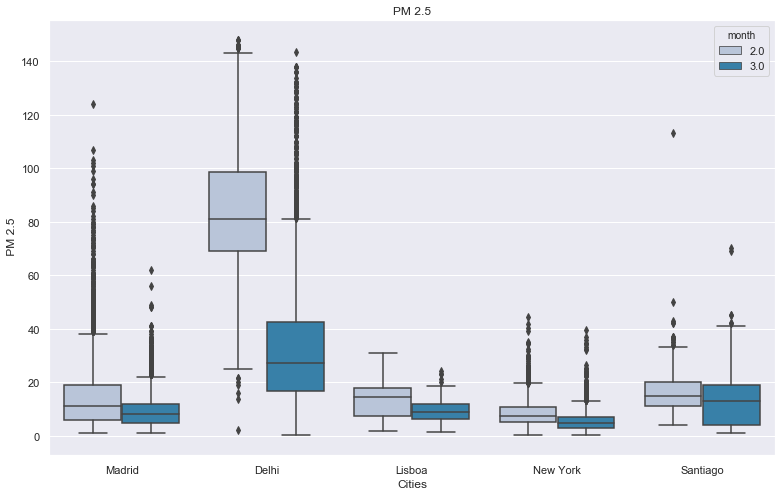

In [16]:
pm25 = data.loc[data['parameter'] == 'pm25']

# Outliers
# remove rows > 125
pm25 = pm25.where(pm25['value'] < 150)
pm25.sort_values(by="value", ascending = False).head()

pm25 = pm25.dropna()
# madrid.shape(9889)

sns.set()
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.boxplot(x="city", y="value", hue = "month",
                  data=pm25, palette="PuBu")

# ax.set_xticklabels(['February, 'March'])
ax.set_xlabel("Cities")
ax.set_ylabel(" PM 2.5")
ax.set_title('PM 2.5')
  
plt.show()

# NO2

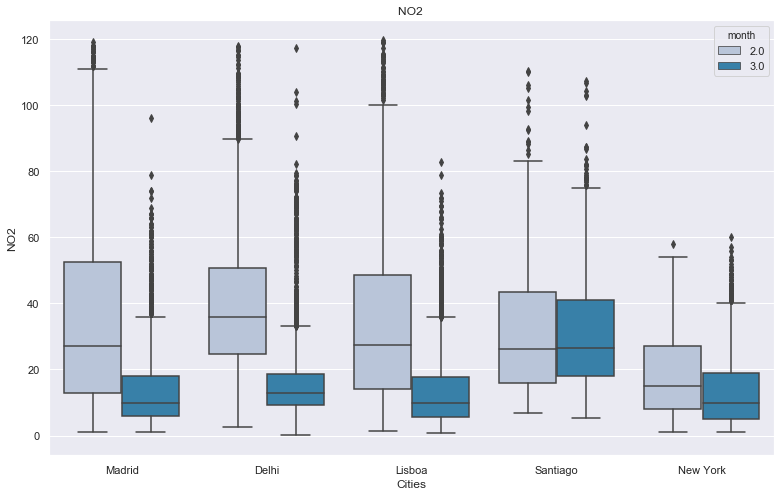

In [17]:
no2 = data.loc[data['parameter'] == 'no2']

# Outliers
# # remove rows > 125
no2 = no2.where(no2['value'] < 120)
no2.sort_values(by="value", ascending = False).head()

no2 = no2.dropna()
# # madrid.shape(9889)

sns.set()
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.boxplot(x="city", y="value", hue = "month",
                  data=no2, palette="PuBu")

# ax.set_xticklabels(['February, 'March'])
ax.set_xlabel("Cities")
ax.set_ylabel("NO2")
ax.set_title('NO2 ')
   
plt.show()

# O3

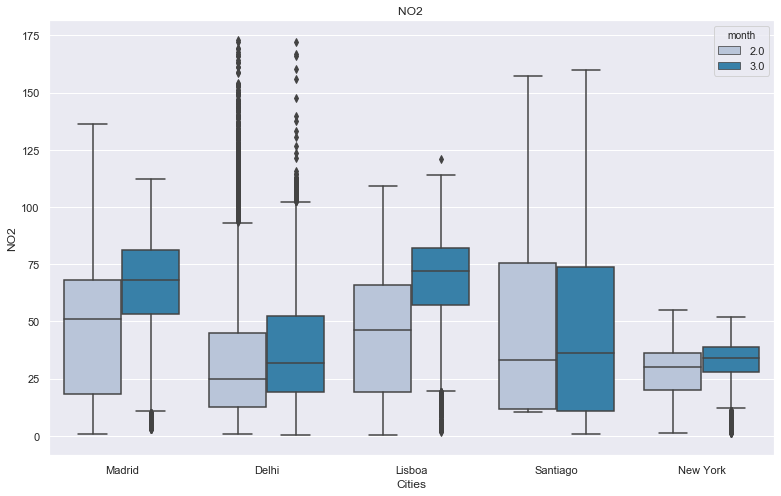

In [42]:
o3 = data.loc[data['parameter'] == 'o3']

# Outliers
# # remove rows > 125
o3 = o3.where(o3['value'] < 175)
o3.sort_values(by="value", ascending = False).head()

o3 = o3.dropna()
# # madrid.shape(9889)

sns.set()
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.boxplot(x="city", y="value", hue = "month",
                  data=o3, palette="PuBu")

# ax.set_xticklabels(['February, 'March'])
ax.set_xlabel("Cities")
ax.set_ylabel("NO2")
ax.set_title('NO2 ')
   
plt.show()

# CO

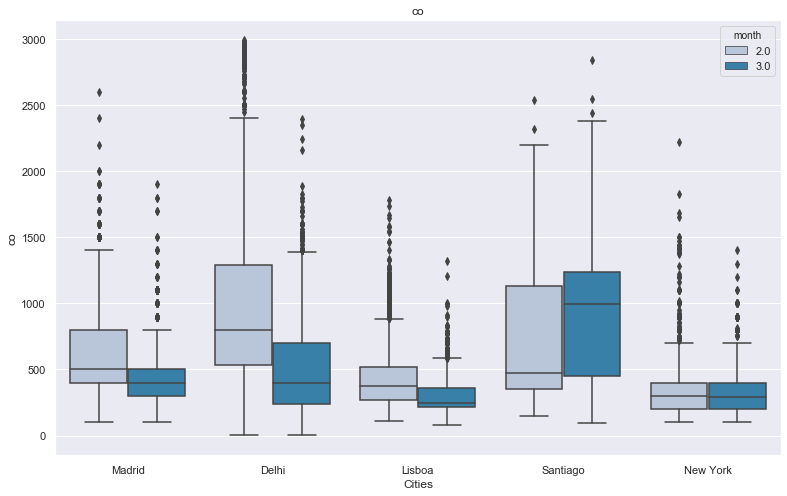

In [27]:
co = data.loc[data['parameter'] == 'co']
co.head()
# Outliers
# remove rows > 3000
co =co.where(co['value'] < 3000)
co.sort_values(by="value", ascending = False).head()
co =co.dropna()
# # madrid.shape(9889)

sns.set()
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.boxplot(x="city", y="value", hue = "month",
                  data = co, palette="PuBu")

# ax.set_xticklabels(['February, 'March'])
ax.set_xlabel("Cities")
ax.set_ylabel("co")
ax.set_title('co')
   
plt.show()

## Madrid

In [20]:
# madrid = data.loc[data['city'] == 'Madrid']
# madrid = madrid.loc[madrid['parameter'] == 'pm25']
# madrid.head()

# # Outliers
# # remove rows > 125
# madrid = madrid.where(madrid['value'] < 50)
# madrid.sort_values(by="value", ascending = False).head()

# madrid = madrid.dropna()
# # madrid.shape(9889)

# sns.set()
# fig, ax = plt.subplots(figsize=(8,6))
# ax = sns.boxplot(x="month", y="value",
#                   data=madrid, palette="Blues_d")

# ax.set_xticklabels(['February', 'March'])
# ax.set_xlabel(" Months ")
# ax.set_ylabel(" PM 2.5")
# ax.set_title('PM 2.5 in Madrid')
   
# plt.show()

# IQA

In [85]:
# o3 = pd.DataFrame(o3)
pm25_group = pm25.groupby(['city','day', 'month'])['value'].agg(['mean']).reset_index()
pm25_group.head()

,city,day,month,mean
0,Delhi,27.0,2.0,96.617530
1,Delhi,28.0,2.0,74.714527
2,Delhi,28.0,3.0,26.557788
3,Delhi,29.0,2.0,68.336897
4,Delhi,29.0,3.0,28.821943


In [104]:
# Categories
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

bins = pd.IntervalIndex.from_tuples([(0, 20), (21, 35), (36, 50), (51,100), (101,1200)])
bins_labels = ['Very Good', 'Good', 'Medium','Bad', 'Very Bad']
bins
pm25_group['AQI'] = pd.cut(pm25_group['mean'].to_list(),bins)
# pm25.AQI.unique()
pm25_group.head()

,city,day,month,mean,AQI
0,Delhi,27.0,2.0,96.617530,"(51, 100]"
1,Delhi,28.0,2.0,74.714527,"(51, 100]"
2,Delhi,28.0,3.0,26.557788,"(21, 35]"
3,Delhi,29.0,2.0,68.336897,"(51, 100]"
4,Delhi,29.0,3.0,28.821943,"(21, 35]"


In [67]:
# pm25_group['AQI'].categories = ['Very Good', 'Good', 'Medium','Bad', 'Very Bad']
# pm25_group['AQI'] = pm25_group['AQI'].categories
# pm25_group.head()

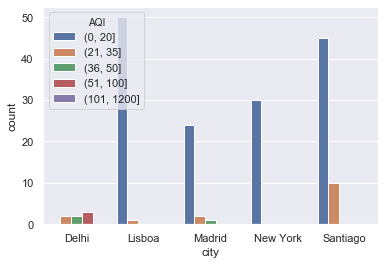

In [115]:
# pm25_cross = pd.crosstab(pm25_group['AQI'], ['city'])
# pm25_cross
# # Initialize the matplotlib figure
# f, ax = plt.subplots(figsize=(10, 5))
# sns.set_color_codes("pastel")

# #Plot
# # sns.barplot(x="city", y="AQI", data=pm25_group,
# #             label="x", color="b")

sns.countplot(x="city", hue='AQI', data=pm25_group)

# # sns.barplot(x="city", y='aqi', hue='month', 
# #     data=pm25_group, ci=None);

# # ax = sns.countplot(y="AQI", hue="city", data=pm25_group)

In [ ]:
pm25_cross = pm_25_group

# To do 

In [118]:
#  mapa.
# lineplots
# IQA

# POp -> Index -> Disponibilidade 

# Criar nova coluna de mean por dia

# pm25_group = pm25.groupby(['city','day', 'month'])['value'].agg(['mean']).reset_index()
# pm25_group.head()

pm25_group['daily_mean'] = pm25_group(['day']).mean(axis=1)
pm25_group.head()

TypeError: 'DataFrame' object is not callable